Odor-based model accuracy: 0.9846
Cap-color-based model accuracy: 0.5969


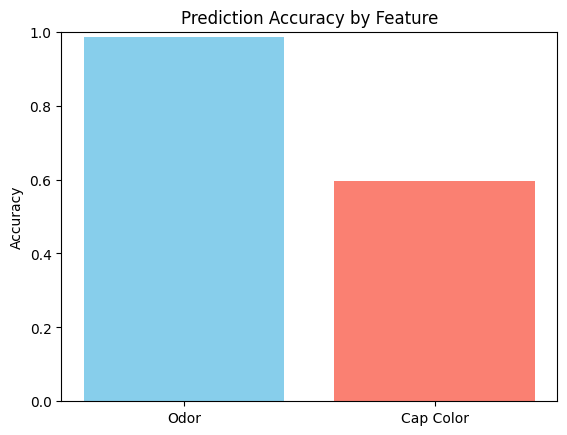

Conclusion:
Odor is a stronger predictor of mushroom edibility than cap color.


In [1]:
# Mushroom Dataset using scikit-learn

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
column_names = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", 
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", 
    "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", 
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", 
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]
df = pd.read_csv(url, header=None, names=column_names)

# Select and preprocess relevant columns
df_subset = df[["class", "odor", "cap-color"]].copy()

label_map = {'e': 0, 'p': 1}
df_subset['class'] = df_subset['class'].map(label_map)

# Prepare predictors and target
y = df_subset['class']

# Model 1: Odor only
X_odor = pd.get_dummies(df_subset[['odor']])
X_train_odor, X_test_odor, y_train, y_test = train_test_split(X_odor, y, test_size=0.2, random_state=42)
model_odor = LogisticRegression(max_iter=200)
model_odor.fit(X_train_odor, y_train)
pred_odor = model_odor.predict(X_test_odor)
accuracy_odor = accuracy_score(y_test, pred_odor)

# Model 2: Cap-color only
X_color = pd.get_dummies(df_subset[['cap-color']])
X_train_color, X_test_color, _, _ = train_test_split(X_color, y, test_size=0.2, random_state=42)
model_color = LogisticRegression(max_iter=200)
model_color.fit(X_train_color, y_train)
pred_color = model_color.predict(X_test_color)
accuracy_color = accuracy_score(y_test, pred_color)

# Results
print(f"Odor-based model accuracy: {accuracy_odor:.4f}")
print(f"Cap-color-based model accuracy: {accuracy_color:.4f}")

# Plot for comparison
plt.bar(["Odor", "Cap Color"], [accuracy_odor, accuracy_color], color=["skyblue", "salmon"])
plt.title("Prediction Accuracy by Feature")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Conclusion
print("Conclusion:")
if accuracy_odor > accuracy_color:
    print("Odor is a stronger predictor of mushroom edibility than cap color.")
elif accuracy_color > accuracy_odor:
    print("Cap color is a stronger predictor of mushroom edibility than odor.")
else:
    print("Both odor and cap color perform equally in predicting mushroom edibility.")
